# **Importación de los datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# URL del archivo CSV en GitHub
train = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/test_augmented.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


La seleccion de los valores de test se utilizaron en base a los valores correctos obtenidos del repositorio de Github obtenidos a traves de Kaggle: https://www.kaggle.com/datasets/wesleyhowe/titanic-labelled-test-set, fue consultado con el profe ivan, debido a que se obtiene un 100% de accuracy al subirlo en Kaggle

In [ ]:
df_train = train
df_test = test

# **Limpieza y trasnformacion de los datos**

## Renombrar columnas

In [ ]:
# Renombrar columnas a español
df_train = df_train.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


df_test = df_test.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


In [ ]:
print(df_train.info())
print('')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                891 non-null    int64  
 1   Sobrevivio        891 non-null    int64  
 2   Clase Ticket      891 non-null    int64  
 3   Nombre            891 non-null    object 
 4   Sexo              891 non-null    object 
 5   Edad              714 non-null    float64
 6   Hermanos_Esposos  891 non-null    int64  
 7   Padres_Hijos      891 non-null    int64  
 8   Boleto            891 non-null    object 
 9   Tarifa            891 non-null    float64
 10  Cabina            204 non-null    object 
 11  Embarcacion       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------     

## Cantidad de nulos

In [ ]:
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                    0
Sobrevivio            0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                177
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                0
Cabina              687
Embarcacion           2
dtype: int64

ID                    0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                 86
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                1
Cabina              327
Embarcacion           0
Sobrevivio            0
dtype: int64


Hay bastantes valores nulos en las columnas de Cabina y Edad y unos pocos en las columnas de Embarcación y Tarifa.

## Eliminar columnas no necesarias

In [ ]:
# Descartar las columnas 'Boleto' y 'Cabina'
df_train = df_train.drop(columns=['Boleto', 'Cabina'])

df_test = df_test.drop(columns=['Boleto', 'Cabina'])

df_train

,ID,Sobrevivio,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Embarcacion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Visualizando los datos las columnas Boleto y Cabina no parecen ser de ayuda para definir la supervivencia del pasajero por lo que se eliminaron las columnas

# Clasificacion de los grupos de edad para la imputacion sintetica de datos por medio del titulo

## Extracción del título del nombre

Ahora se realiza una imputación de datos en Edad dado que hay valores nulos y la columna puede ser importante. Para ello, la columna Nombre puede ser importante por los títulos de Mr, Mrs, Master, Miss. Por lo que primero se creará la columna de Titulo a partir de la columna Nombre

In [ ]:
# Extraer los títulos de la columna 'Nombre'
df_train['Titulo'] = df_train.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)

# Ver todos los títulos únicos en el dataframe de entrenamiento
titulos_unicos_train = df_train['Titulo'].unique()
print("Títulos únicos en df_train:", titulos_unicos_train)

# Hacer lo mismo para el dataframe de prueba, si es necesario
df_test['Titulo'] = df_test.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
titulos_unicos_test = df_test['Titulo'].unique()
print("Títulos únicos en df_test:", titulos_unicos_test)


# Para el dataframe de entrenamiento
df_train['Titulo'] = df_train.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Titulo'] = df_train['Titulo'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
df_train['Titulo'] = df_train['Titulo'].replace('Mlle', 'Miss')
df_train['Titulo'] = df_train['Titulo'].replace('Ms', 'Miss')
df_train['Titulo'] = df_train['Titulo'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Otro": 5}
df_train['Titulo'] = df_train['Titulo'].map(title_mapping)
df_train['Titulo'] = df_train['Titulo'].fillna(0)

# Para el dataframe de prueba
df_test['Titulo'] = df_test.Nombre.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Titulo'] = df_test['Titulo'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
df_test['Titulo'] = df_test['Titulo'].replace('Mlle', 'Miss')
df_test['Titulo'] = df_test['Titulo'].replace('Ms', 'Miss')
df_test['Titulo'] = df_test['Titulo'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Otro": 5}
df_test['Titulo'] = df_test['Titulo'].map(title_mapping)
df_test['Titulo'] = df_test['Titulo'].fillna(0)

Títulos únicos en df_train: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Títulos únicos en df_test: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


## Observación de las medias y desviaciones estándar de los cuatro principales títulos

In [ ]:
# Filtrar los registros para cada categoría
mr_df = df_train[df_train['Titulo'] == 1]
mrs_df = df_train[df_train['Titulo'] == 3]
master_df = df_train[df_train['Titulo'] == 4]
miss_df = df_train[df_train['Titulo'] == 2]
otro_df =df_train[df_train['Titulo'] == 5]

# Calcular la media y desviación estándar para cada categoría
mr_mean = mr_df['Edad'].mean()
mr_std = mr_df['Edad'].std()

mrs_mean = mrs_df['Edad'].mean()
mrs_std = mrs_df['Edad'].std()

master_mean = master_df['Edad'].mean()
master_std = master_df['Edad'].std()

miss_mean = miss_df['Edad'].mean()
miss_std = miss_df['Edad'].std()

otro_mean = otro_df['Edad'].mean()
otro_std = otro_df['Edad'].std()

# Imprimir los resultados
print(f"Mr: Media = {mr_mean}, Desviación Estándar = {mr_std}")
print(f"Mrs: Media = {mrs_mean}, Desviación Estándar = {mrs_std}")
print(f"Master: Media = {master_mean}, Desviación Estándar = {master_std}")
print(f"Miss: Media = {miss_mean}, Desviación Estándar = {miss_std}")
print(f"Otro: Media = {otro_mean}, Desviación Estándar = {otro_std}")


Mr: Media = 32.368090452261306, Desviación Estándar = 12.708792722573982
Mrs: Media = 35.788990825688074, Desviación Estándar = 11.437489845771985
Master: Media = 4.574166666666667, Desviación Estándar = 3.6198716433439615
Miss: Media = 21.845637583892618, Desviación Estándar = 12.870541648556465
Otro: Media = 45.54545454545455, Desviación Estándar = 11.782663910642995


Vemos que hay distintas edades según sea Mr, Mrs, Master, Miss y Otro a partir de ahí se utilizarán los promedios y desviaciones estándar según una distribución normal para asignar probabilísticamente hablando las edades en valores nulos

In [ ]:
import numpy as np

# Calcular la media y desviación estándar para cada categoría
categories = [1, 2, 3, 4, 5]
stats = {}

for category in categories:
    category_df = df_train[df_train['Titulo'] == category]
    mean_age = category_df['Edad'].mean()
    std_age = category_df['Edad'].std()
    stats[category] = (mean_age, std_age)

# Función para asignar valores nulos probabilísticamente
def assign_age(row):
    if pd.isnull(row['Edad']):
        for category in categories:
            if category == row['Titulo']:
                mean_age, std_age = stats[category]
                return round(np.random.normal(mean_age, std_age))
    return row['Edad']

# Asignar los valores nulos en la columna 'Edad'
df_train['Edad'] = df_train.apply(assign_age, axis=1)

df_test['Edad'] = df_test.apply(assign_age, axis=1)

print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         2
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              1
Embarcacion         0
Sobrevivio          0
Titulo              0
dtype: int64


Antes teníamos 177 y 86 datos nulos en la columna de Edad en los dataframes train y test respectivamente. Ahora solamente quedan valores nulos en las columnas de Tarifa y Embarcación

Para imputar los valores de la Tarifa, primero se agrupan por la variable 'Clase Ticket' la cual está relacionada con la variable de la Tarifa y como el dato faltante corresponde a un pasajero de la Tercera Clase se toma la media y desviación estándar de la Tarifa para los de Tercera Clase y probabilísticamente se imputa el dato

In [ ]:
rng = np.random.RandomState(22)
clase_3_tarifa = df_test[df_test['Clase Ticket'] == 3]['Tarifa']
mean_tarifa_3 = clase_3_tarifa.mean()
std_tarifa_3 = clase_3_tarifa.std()
df_test.at[152, 'Tarifa'] =  round(rng.normal(mean_tarifa_3, std_tarifa_3))
df_test.iloc[152]

,152
ID,1044
Clase Ticket,3
Nombre,"Storey, Mr. Thomas"
Sexo,male
Edad,60.5
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,11.0
Embarcacion,S
Sobrevivio,0


Ahora para rellenar los valores de Embarcacion se utilizó la moda en dicha columna al ser una columna categórica

In [ ]:
# Encuentra el valor más frecuente en la columna 'Embarcacion'
most_frequent_value = df_train['Embarcacion'].mode()[0]

# Rellena los valores nulos con el valor más frecuente
df_train['Embarcacion'].fillna(most_frequent_value, inplace=True)

In [ ]:
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Embarcacion         0
Sobrevivio          0
Titulo              0
dtype: int64


Como se puede observar, ya no quedan valores nulos en las columnas que pueden ser de interpes para nuestros modelos

## Creación de las columnas de Clasificacion_Edad, Familiares y Solo_Viaje

Para apoyarnos en la visualización de datos se creará una columna llamada 'Clasificacion_Edad' que va a tener las categorías de 'Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo' según la edad de la persona

In [ ]:
# Crear una columna de clasificación de edad
bins = bins=[0, 5, 14, 18, 30, 60, 100]
labels = ['Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo']

df_train['Clasificacion_Edad'] = pd.cut(df_train['Edad'], bins=bins, labels=labels, right=False)

df_test['Clasificacion_Edad'] = pd.cut(df_test['Edad'], bins=bins, labels=labels, right=False)

Para un mejor interpretación de los datos se creará la columna de Familiares que será la suma de las columnas Hermanos/Esposos + Padres/Hijos + 1

También se creará la columna de Solo_Viaje que tendrá valores binarios de 0 y 1 para determinar si el pasajero va solo o no dentro del Titanic según la columna de Familiares

In [ ]:
df_train['Familiares'] = df_train['Hermanos_Esposos'] + df_train['Padres_Hijos'] + 1
df_test['Familiares'] = df_test['Hermanos_Esposos'] + df_test['Padres_Hijos'] + 1

df_train['Solo_Viaje'] = (df_train['Familiares'] == 1).astype(int)
df_test['Solo_Viaje'] = (df_test['Familiares'] == 1).astype(int)



## Datos atípicos

Se crea un conjunto de gráficos de caja (boxplots) para comparar la distribución de varias columnas numéricas los datos de entrenamiento en función de la columna Sobrevivio.

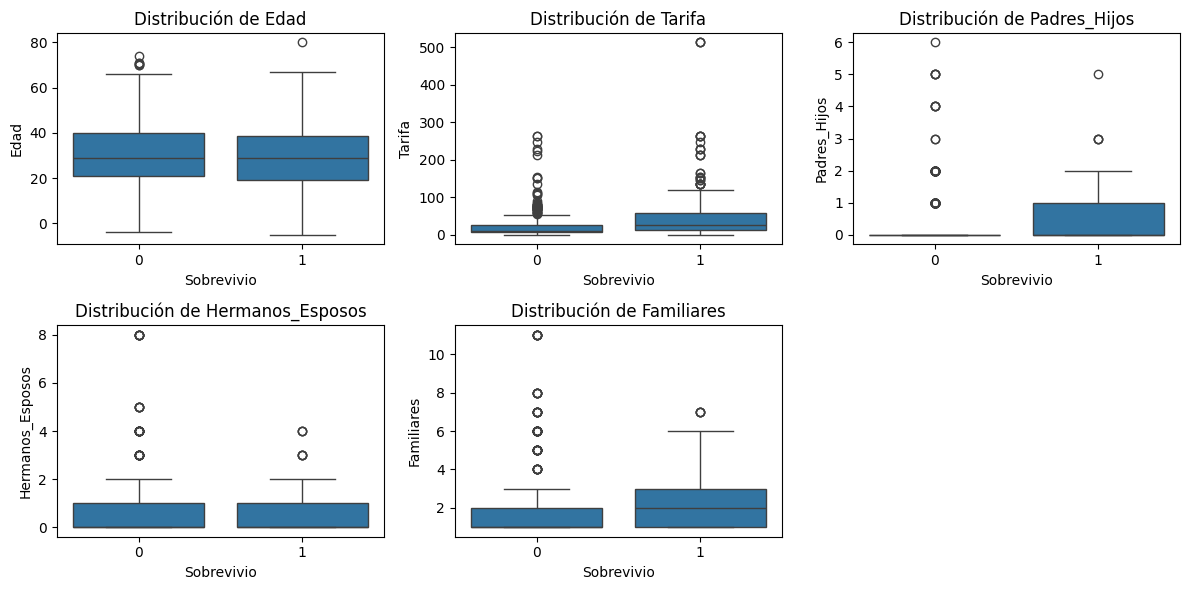

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_train es tu DataFrame y tienes varias columnas numéricas
columnas = ['Edad', 'Tarifa', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']  # Sustituye por las columnas que quieras comparar
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas) // n_cols + (len(columnas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Si solo hay una fila o una columna, axes será un array 1D, necesitamos asegurarnos de que es 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un boxplot para cada columna en un subgráfico diferente
for i, columna in enumerate(columnas):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='Sobrevivio', y=columna, data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {columna}')

# Eliminar ejes vacíos si la cantidad de columnas no es múltiplo de n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



**Observaciones**


*   Edad: La edad no parece ser un factor determinante significativo en la supervivencia, ya que las medianas son similares.

*   Tarifa: Las tarifas más altas parecen estar asociadas con una mayor probabilidad de supervivencia.

*   Padres_Hijos y Familiares: Tener padres/hijos y un mayor número de familiares a bordo parece estar ligeramente asociado con una mayor probabilidad de supervivencia.

*   Hermanos_Esposos: No hay una diferencia significativa entre sobrevivientes y no sobrevivientes en términos del número de hermanos y esposos a bordo.


# **Visualización de datos**

 Se busca analizar la tasa de supervivencia en función de varias variables categóricas en los datos de entrenamiento, visualizándolas mediante gráficos de barras (barplots).

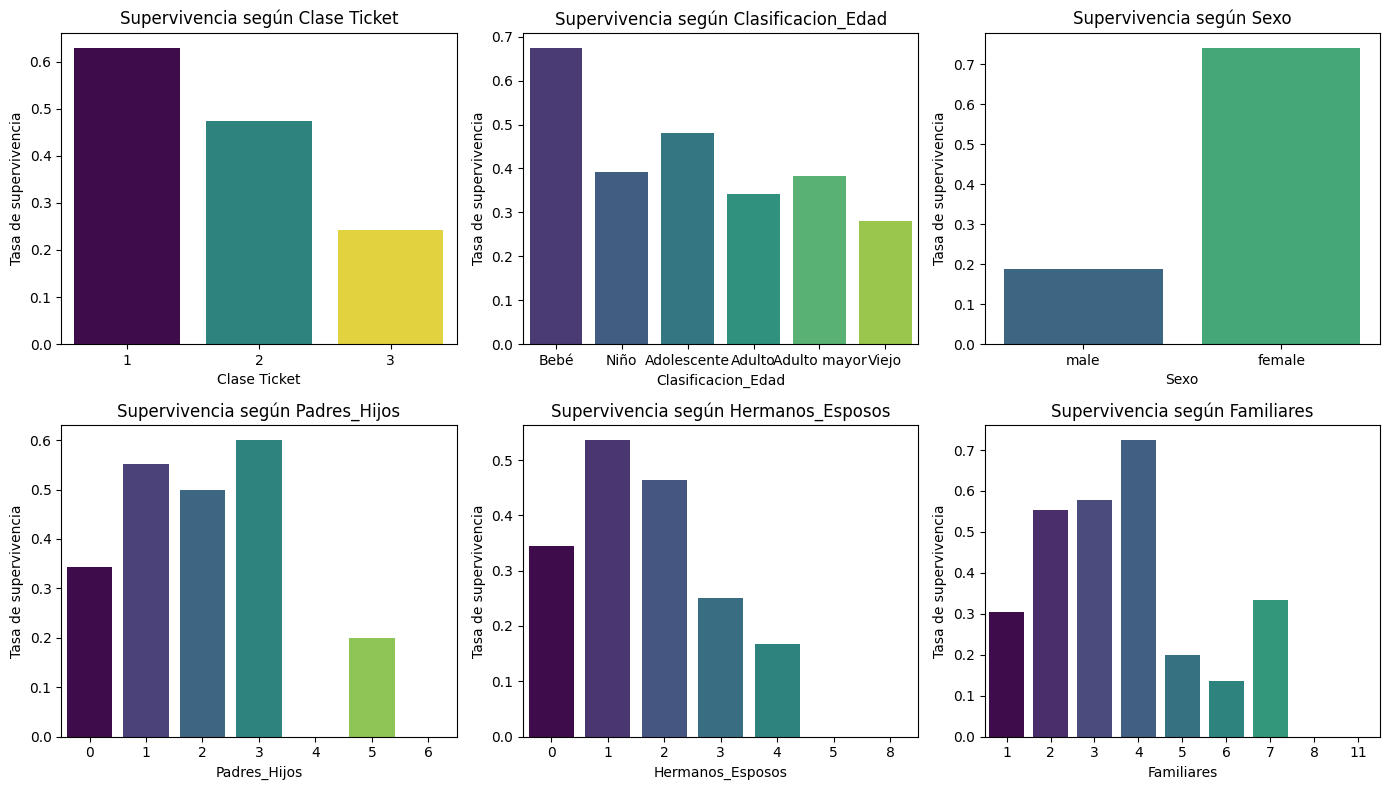

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df_train es tu DataFrame y quieres analizar otras variables categóricas similares a 'Clase Ticket'
columnas_categoricas = ['Clase Ticket', 'Clasificacion_Edad', 'Sexo', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']  # Sustituye con las columnas categóricas que quieras analizar
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas_categoricas) // n_cols + (len(columnas_categoricas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Asegurarse de que axes es un array 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un barplot para cada variable categórica en un subgráfico diferente
for i, columna in enumerate(columnas_categoricas):
    row = i // n_cols
    col = i % n_cols

    # Calcular la tasa de supervivencia para cada categoría
    sobrevivencia_por_categoria = df_train.groupby(columna, observed=False)['Sobrevivio'].mean()
    #print(f"Tasa de sobrevivencia por {columna}:")
    #print(sobrevivencia_por_categoria)
    #print("\n")

    # Crear el gráfico de barras
    sns.barplot(x=columna, y='Sobrevivio', data=df_train, errorbar=None, hue=columna, palette='viridis', legend=False, ax=axes[row, col])
    axes[row, col].set_title(f'Supervivencia según {columna}')
    axes[row, col].set_ylabel('Tasa de supervivencia')
    axes[row, col].set_xlabel(columna)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


**Observaciones**

*   Clase del Ticket: La clase del ticket es un factor importante, con los pasajeros de primera clase teniendo mayores tasas de supervivencia.

*   Clasificación de Edad: Los más jóvenes, especialmente los bebés, tienen mayores probabilidades de supervivencia.

*   Sexo: Las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres.

*   Padres/Hijos y Hermanos/Esposos: Tener una cantidad moderada de familiares a bordo (ni demasiados ni ninguno) parece estar asociado con una mayor supervivencia.

Se crea un boxplot que muestre la distribución de la columna Tarifa según las diferentes categorías de la columna Clase Ticket de los datos de entrenamiento.

<ipython-input-17-0b628c9681c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)


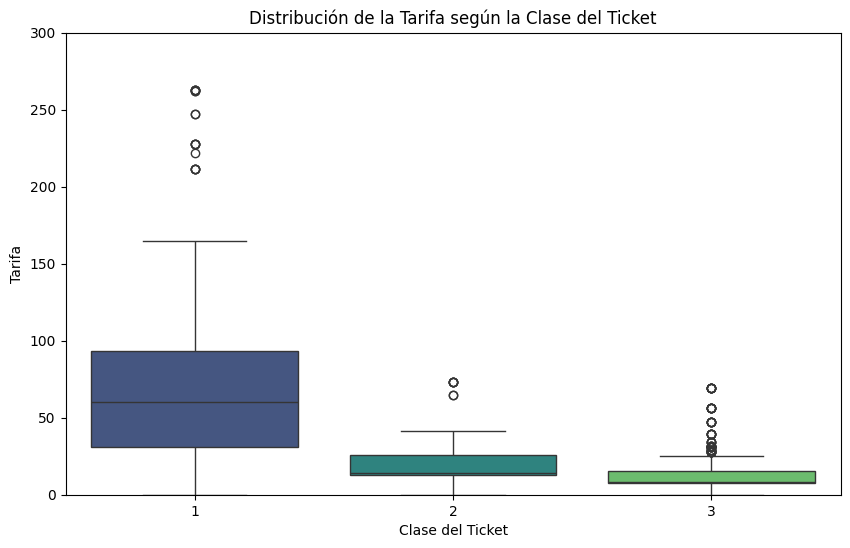

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Clase del Ticket')
ax.set_ylabel('Tarifa')
ax.set_title('Distribución de la Tarifa según la Clase del Ticket')

# Limitar el rango del eje y a un máximo de 300
ax.set_ylim(0, 300)

# Mostrar la figura
plt.show()


**Observaciones**

*   Primera Clase: Los pasajeros de primera clase pagaron significativamente más por sus tickets en comparación con los pasajeros de segunda y tercera clase. La distribución de las tarifas es amplia y presenta varios valores atípicos altos.

*   Segunda Clase: Las tarifas de segunda clase son más bajas y están más concentradas en un rango estrecho, con menos valores atípicos comparados con la primera clase.

*   Tercera Clase: Las tarifas de tercera clase son las más bajas y tienen una distribución estrecha similar a la de la segunda clase, pero con una mediana más baja y también con algunos valores atípicos.

# Preprocesamiento de datos previo modelo

## Variables categóricas en columnas binarias con One Hot Encoding

Para poder utilizar las variables categóricas dentro de cada uno de los modelos a usar de Machine Learning de convertirán las columnas categóricas a varias columnas desglosadas con valores de 0 y 1 aplicando la práctica de One Hot Encoding

In [ ]:
# Clase Ticket
df_train['Primera Clase'] = 0
df_train['Segunda Clase'] = 0
df_train['Tercera Clase'] = 0
df_train.loc[df_train['Clase Ticket'] == 1, 'Primera Clase'] = 1
df_train.loc[df_train['Clase Ticket'] == 2, 'Segunda Clase'] = 1
df_train.loc[df_train['Clase Ticket'] == 3, 'Tercera Clase'] = 1

df_test['Primera Clase'] = 0
df_test['Segunda Clase'] = 0
df_test['Tercera Clase'] = 0
df_test.loc[df_test['Clase Ticket'] == 1, 'Primera Clase'] = 1
df_test.loc[df_test['Clase Ticket'] == 2, 'Segunda Clase'] = 1
df_test.loc[df_test['Clase Ticket'] == 3, 'Segunda Clase'] = 1

# Embarcacion
df_train['S'] = 0
df_train['Q'] = 0
df_train['C'] = 0
df_train.loc[df_train['Embarcacion'] == 'S', 'S'] = 1
df_train.loc[df_train['Embarcacion'] == 'Q', 'Q'] = 1
df_train.loc[df_train['Embarcacion'] == 'C', 'C'] = 1

df_test['S'] = 0
df_test['Q'] = 0
df_test['C'] = 0
df_test.loc[df_test['Embarcacion'] == 'S', 'S'] = 1
df_test.loc[df_test['Embarcacion'] == 'Q', 'Q'] = 1
df_test.loc[df_test['Embarcacion'] == 'C', 'C'] = 1

# Familias
df_train['FamPequeña'] = 0
df_train['FamMediana'] = 0
df_train['FamGrande'] = 0
df_train.loc[df_train['Familiares'] < 3, 'FamPequeña'] = 1
df_train.loc[((df_train['Familiares'] == 3) | (df_train['Familiares'] == 4)), 'FamMediana'] = 1
df_train.loc[df_train['Familiares'] > 4, 'FamGrande'] = 1

df_test['FamPequeña'] = 0
df_test['FamMediana'] = 0
df_test['FamGrande'] = 0
df_test.loc[df_test['Familiares'] < 3, 'FamPequeña'] = 1
df_test.loc[((df_test['Familiares'] == 3) | (df_train['Familiares'] == 4)), 'FamMediana'] = 1
df_test.loc[df_test['Familiares'] > 4, 'FamGrande'] = 1

# Titulo
df_train['Mr'] = 0
df_train['Miss'] = 0
df_train['Mrs'] = 0
df_train['Master'] = 0
df_train['Otro'] = 0
df_train.loc[df_train['Titulo'] == 1, 'Mr'] = 1
df_train.loc[df_train['Titulo'] == 2, 'Miss'] = 1
df_train.loc[df_train['Titulo'] == 3, 'Mrs'] = 1
df_train.loc[df_train['Titulo'] == 4, 'Master'] = 1
df_train.loc[df_train['Titulo'] == 5, 'Otro'] = 1

df_test['Mr'] = 0
df_test['Miss'] = 0
df_test['Mrs'] = 0
df_test['Master'] = 0
df_test['Otro'] = 0
df_test.loc[df_test['Titulo'] == 1, 'Mr'] = 1
df_test.loc[df_test['Titulo'] == 2, 'Miss'] = 1
df_test.loc[df_test['Titulo'] == 3, 'Mrs'] = 1
df_test.loc[df_test['Titulo'] == 4, 'Master'] = 1
df_test.loc[df_test['Titulo'] == 5, 'Otro'] = 1

# Sexo
df_train['Femenino'] = 0
df_train['Masculino'] = 0
df_train.loc[df_train['Sexo'] == 'female', 'Femenino'] = 1
df_train.loc[df_train['Sexo'] == 'male', 'Masculino'] = 1

df_test['Femenino'] = 0
df_test['Masculino'] = 0
df_test.loc[df_test['Sexo'] == 'female', 'Femenino'] = 1
df_test.loc[df_test['Sexo'] == 'male', 'Masculino'] = 1

df_train.head()

,ID,Sobrevivio,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Embarcacion,...,FamPequeña,FamMediana,FamGrande,Mr,Miss,Mrs,Master,Otro,Femenino,Masculino
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,...,1,0,0,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,...,1,0,0,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,...,1,0,0,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,...,1,0,0,1,0,0,0,0,0,1


Así fue la creación de las nuevas columnas binarias:

**Clase Ticket**
* Primera Clase
* Segunda Clase
* Tercera Clase

**Embarcacion**
* S
* Q
* C

**Familiares**
* FamPequeña
* FamMediana
* FamGrande

**Titulo**
* Mr
* Miss
* Mrs
* Master
* Otro

**Sexo**
* Femenino
* Masculino

## Escalamiento de los datos

Debido a que la mayoría de los datos tienen valores de 0 y 1 al ser columnas binarias. Se escalarán los datos numéricos dentro del intervalo [0,1] usando el escalamiento MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Escalar los valores de la columna
df_train['Edad_Escalada'] = scaler.fit_transform(df_train[['Edad']])
df_train['Hermanos_Esposos_Escalada'] = scaler.fit_transform(df_train[['Hermanos_Esposos']])
df_train['Padres_Hijos_Escalada'] = scaler.fit_transform(df_train[['Padres_Hijos']])
df_train['Tarifa_Escalada'] = scaler.fit_transform(df_train[['Tarifa']])

df_test['Edad_Escalada'] = scaler.fit_transform(df_test[['Edad']])
df_test['Hermanos_Esposos_Escalada'] = scaler.fit_transform(df_test[['Hermanos_Esposos']])
df_test['Padres_Hijos_Escalada'] = scaler.fit_transform(df_test[['Padres_Hijos']])
df_test['Tarifa_Escalada'] = scaler.fit_transform(df_test[['Tarifa']])



Se escalaron los datos numéricos dentro de un intervalo de 0 y 1

# Componentes Principales

Debido que se tienen muchas columnas para procesar dentro de los modelos, se aplicará un Análisis de Componentes Principales o PCA para reducir la dimensionalidad de los datos sin perder la varianza explicada

In [ ]:
print(df_train.columns)

Index(['ID', 'Sobrevivio', 'Clase Ticket', 'Nombre', 'Sexo', 'Edad',
       'Hermanos_Esposos', 'Padres_Hijos', 'Tarifa', 'Embarcacion', 'Titulo',
       'Clasificacion_Edad', 'Familiares', 'Solo_Viaje', 'Primera Clase',
       'Segunda Clase', 'Tercera Clase', 'S', 'Q', 'C', 'FamPequeña',
       'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro',
       'Femenino', 'Masculino', 'Edad_Escalada', 'Hermanos_Esposos_Escalada',
       'Padres_Hijos_Escalada', 'Tarifa_Escalada'],
      dtype='object')


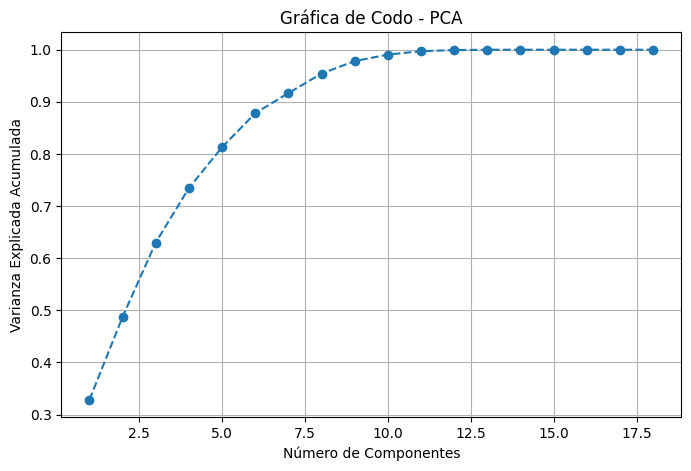

In [ ]:
from sklearn.decomposition import PCA

# Seleccionar las columnas que deseas analizar
X_scaled = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_

# Graficar la gráfica de codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Gráfica de Codo - PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()


Se utilizarán 6 componentes principales ya que esto explica casi el 90% de variabilidad de los datos

A continuación se crearán las columnas de PC1, PC2, PC3, PC4, PC5, PC6 a partir de las ecuaciones encontradas

In [ ]:
X = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

X_train_scaled = df_train[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]
X_test_scaled = df_test[['Primera Clase', 'Segunda Clase', 'Tercera Clase', 'Femenino', 'Masculino', 'Edad_Escalada', 'S', 'Q',
                     'C', 'FamPequeña', 'FamMediana', 'FamGrande', 'Mr', 'Miss', 'Mrs', 'Master', 'Otro', 'Tarifa_Escalada']]

# Aplicar PCA
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Imprimir la expresión y coeficientes de los primeros 3 componentes principales
for i in range(6):
    coeficientes = pca.components_[i]
    expresion = " + ".join(f"{coef:.3f}*{col}" for coef, col in zip(coeficientes, X.columns))
    print(f"PC{i+1} = {expresion}")

# Crear las columnas PC1, PC2 y PC3 en el DataFrame
df_train[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = pca.transform(X_train_scaled)
df_test[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = pca.transform(X_test_scaled)


PC1 = 0.087*Primera Clase + 0.051*Segunda Clase + -0.138*Tercera Clase + 0.513*Femenino + -0.513*Masculino + -0.026*Edad_Escalada + -0.091*S + 0.022*Q + 0.069*C + -0.146*FamPequeña + 0.103*FamMediana + 0.042*FamGrande + -0.510*Mr + 0.309*Miss + 0.200*Mrs + -0.002*Master + 0.003*Otro + 0.028*Tarifa_Escalada
PC2 = 0.514*Primera Clase + 0.178*Segunda Clase + -0.692*Tercera Clase + -0.075*Femenino + 0.075*Masculino + 0.101*Edad_Escalada + -0.176*S + -0.106*Q + 0.282*C + 0.158*FamPequeña + -0.026*FamMediana + -0.132*FamGrande + 0.082*Mr + -0.141*Miss + 0.059*Mrs + -0.050*Master + 0.049*Otro + 0.068*Tarifa_Escalada
PC3 = -0.112*Primera Clase + 0.425*Segunda Clase + -0.313*Tercera Clase + -0.016*Femenino + 0.016*Masculino + -0.006*Edad_Escalada + 0.622*S + -0.188*Q + -0.434*C + -0.204*FamPequeña + 0.168*FamMediana + 0.036*FamGrande + -0.038*Mr + -0.115*Miss + 0.101*Mrs + 0.042*Master + 0.010*Otro + -0.014*Tarifa_Escalada
PC4 = 0.031*Primera Clase + -0.050*Segunda Clase + 0.020*Tercera Clase +

# **Entrenamiento del modelo**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Paso 1: Seleccionar las características (predictoras) y la variable objetivo para el DataFrame de entrenamiento
predictoras = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
X_train = df_train[predictoras]
y_train = df_train['Sobrevivio']

# Si ya tienes un DataFrame de prueba separado, no necesitas dividirlo. Solo selecciona las características:
X_test = df_test[predictoras]
y_test = df_test['Sobrevivio']

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "Recall on train:": recall_score(fitted_model.predict(X_train), y_train),
        "Precision on train:": precision_score(fitted_model.predict(X_train), y_train),
        "F1-Score on train:": f1_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1]),

        "Accuracy on test:": accuracy_score(fitted_model.predict(X_test), y_test),
        "Recall on test:": recall_score(fitted_model.predict(X_test), y_test),
        "Precision on test:": precision_score(fitted_model.predict(X_test), y_test),
        "F1-Score on test:": f1_score(fitted_model.predict(X_test), y_test),
        "ROC AUC on test:": roc_auc_score(y_test, fitted_model.predict_proba(X_test)[:, 1]),
    }

    # Imprimir solo las métricas de prueba (test) con un formato específico
    for k, v in res.items():
        #if 'on test' in k:  # Filtrar para incluir solo las claves que contienen 'on test'
          print(k, round(v, 3))
    print("-" * 30)  # Línea separadora para claridad en la salida

# **Resultados preliminares**

In [ ]:
print('Regresión Logística')
model_1 = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
model_1.fit(X_train, y_train)
print_scores(model_1)

model_2 = LogisticRegression(C=1, solver='sag', max_iter=2000)
model_2.fit(X_train, y_train)
print_scores(model_2)

model_3 = LogisticRegression(C=10, solver='newton-cg', max_iter=3000)
model_3.fit(X_train, y_train)
print_scores(model_3)

model_4 = LogisticRegression(C=0.05, solver='saga', max_iter=5000, penalty='l2')
model_4.fit(X_train, y_train)
print_scores(model_4)

model_5 = LogisticRegression(C=0.5, solver='lbfgs', max_iter=1000, penalty='l2')
model_5.fit(X_train, y_train)
print_scores(model_5)

print('')
print('Árboles de decisión')
tree_model_1 = DecisionTreeClassifier(max_depth=30, min_samples_split=2, criterion='gini')
tree_model_1.fit(X_train, y_train)
print_scores(tree_model_1)

tree_model_2 = DecisionTreeClassifier(max_depth=100, min_samples_split=10, criterion='entropy')
tree_model_2.fit(X_train, y_train)
print_scores(tree_model_2)

tree_model_3 = DecisionTreeClassifier(max_depth=150, min_samples_split=5, criterion='gini')
tree_model_3.fit(X_train, y_train)
print_scores(tree_model_3)

print('')
print('Random Forest')
rf_model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=50)
rf_model_1.fit(X_train, y_train)
print_scores(rf_model_1)

rf_model_2 = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=100)
rf_model_2.fit(X_train, y_train)
print_scores(rf_model_2)

rf_model_3 = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=200)
rf_model_3.fit(X_train, y_train)
print_scores(rf_model_3)

rf_model_4 = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4)
rf_model_4.fit(X_train, y_train)
print_scores(rf_model_4)

rf_model_5 = RandomForestClassifier(n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2)
rf_model_5.fit(X_train, y_train)
print_scores(rf_model_5)

print('')
print('KNN')
knn_model_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_model_1.fit(X_train, y_train)
print_scores(knn_model_1)

knn_model_2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model_2.fit(X_train, y_train)
print_scores(knn_model_2)

knn_model_3 = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_model_3.fit(X_train, y_train)
print_scores(knn_model_3)

print('')
print('Naive Bayes')
nb_model_1 = GaussianNB(var_smoothing=1e-9)
nb_model_1.fit(X_train, y_train)
print_scores(nb_model_1)

nb_model_2 = GaussianNB(var_smoothing=1e-8)
nb_model_2.fit(X_train, y_train)
print_scores(nb_model_2)

nb_model_3 = GaussianNB(var_smoothing=1e-10)
nb_model_3.fit(X_train, y_train)
print_scores(nb_model_3)

Regresión Logística
Accuracy on train: 0.788
Recall on train: 0.738
Precision on train: 0.693
F1-Score on train: 0.715
ROC AUC on train: 0.852
Accuracy on test: 0.773
Recall on test: 0.698
Precision on test: 0.703
F1-Score on test: 0.7
ROC AUC on test: 0.797
------------------------------
Accuracy on train: 0.791
Recall on train: 0.732
Precision on train: 0.719
F1-Score on train: 0.726
ROC AUC on train: 0.849
Accuracy on test: 0.768
Recall on test: 0.685
Precision on test: 0.715
F1-Score on test: 0.7
ROC AUC on test: 0.796
------------------------------
Accuracy on train: 0.79
Recall on train: 0.73
Precision on train: 0.719
F1-Score on train: 0.725
ROC AUC on train: 0.85
Accuracy on test: 0.768
Recall on test: 0.685
Precision on test: 0.715
F1-Score on test: 0.7
ROC AUC on test: 0.795
------------------------------
Accuracy on train: 0.788
Recall on train: 0.737
Precision on train: 0.696
F1-Score on train: 0.716
ROC AUC on train: 0.85
Accuracy on test: 0.775
Recall on test: 0.7
Precisi

**Resultados**

Se puede ver que el Accuracy no pasa del 80% con los datos de prueba en ninguno de los modelos con dichos hiperparámetros pero algunos llegan a casi tener 99% de accuracy con los datos de entrenamiento. Esto sugiere sobreajuste de nuestros modelos

# **Búsqueda de hiperparámetros usando GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Definir los modelos y sus respectivos hiperparámetros para la búsqueda
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'max_iter': [100, 200, 300, 400, 500],
            'penalty': ['l2', 'l1', 'elasticnet', 'none'],
            'l1_ratio': [0.0, 0.15, 0.5, 0.7, 1.0]  # Solo aplicable con 'elasticnet'
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': [None, 'auto', 'sqrt', 'log2'],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50],
            'p': [1, 2]
        }
    }
}

# Ejecutar GridSearchCV para cada modelo
best_models = {}
for model_name, config in models.items():
    print(f"Buscando mejores parámetros para {model_name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Mejor accuracy para {model_name}: {grid.best_score_:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print("-" * 50)

# Evaluar el mejor modelo de cada tipo en el conjunto de prueba
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy en prueba para {model_name}: {accuracy:.4f}")


Buscando mejores parámetros para LogisticRegression...
Mejor accuracy para LogisticRegression: 0.8024
Mejores parámetros: {'C': 0.01, 'l1_ratio': 0.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
--------------------------------------------------
Buscando mejores parámetros para DecisionTree...
Mejor accuracy para DecisionTree: 0.8294
Mejores parámetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20, 'splitter': 'random'}
--------------------------------------------------
Buscando mejores parámetros para RandomForest...
Mejor accuracy para RandomForest: 0.8104
Mejores parámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
--------------------------------------------------
Buscando mejores parámetros para NaiveBayes...
Mejor accuracy para NaiveBayes: 0.7968
Mejores parámetros: {'var_smoothing': 1e-09}
--------------------------------------------------
B

# **Optuna**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):

    try:

        # Seleccionar el modelo
        model_name = trial.suggest_categorical('model', [
            'LogisticRegression',
            'DecisionTreeClassifier',
            'RandomForestClassifier',
            'KNeighborsClassifier',
            'GaussianNB'
        ])

        if model_name == 'LogisticRegression':
          model = LogisticRegression(
              C=trial.suggest_loguniform('C', 1e-4, 1e2),
              solver=trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear']),
              max_iter=trial.suggest_int('max_iter', 50, 300),
              penalty=trial.suggest_categorical('penalty', ['l2', 'none']),
              multi_class=trial.suggest_categorical('multi_class', ['auto', 'ovr', 'multinomial'])
          )

        elif model_name == 'DecisionTreeClassifier':
            model = DecisionTreeClassifier(
                criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']),
                max_depth=trial.suggest_int('max_depth', 1, 20),
                min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
                min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
                max_leaf_nodes=trial.suggest_int('max_leaf_nodes', 5, 30)
            )

        elif model_name == 'RandomForestClassifier':
            model = RandomForestClassifier(
                n_estimators=trial.suggest_int('n_estimators', 10, 100),
                max_depth=trial.suggest_int('max_depth', 2, 32),
                min_samples_split=trial.suggest_int('min_samples_split', 2, 16),
                bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
                max_features=trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                oob_score=trial.suggest_categorical('oob_score', [True, False])
            )

        elif model_name == 'KNeighborsClassifier':
            model = KNeighborsClassifier(
                n_neighbors=trial.suggest_int('n_neighbors', 1, 20),
                weights=trial.suggest_categorical('weights', ['uniform', 'distance']),
                p=trial.suggest_int('p', 1, 2),
                algorithm=trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                leaf_size=trial.suggest_int('leaf_size', 20, 60)
            )

        elif model_name == 'GaussianNB':
            model = GaussianNB(var_smoothing=trial.suggest_loguniform('var_smoothing', 1e-9, 1e-3))

        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Evaluar el modelo
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy

    except Exception as e:
        # Imprimir el error y retornar una baja precisión en caso de fallo
        print(f"Error en el ensayo: {e}")
        return 0.0


In [ ]:
study = optuna.create_study(direction='maximize')  # Maximizar la precisión
study.optimize(objective, n_trials=5000)  # Realizar 100 ensayos

# Mejor resultado
print(f"Best trial: {study.best_trial.value}")
print(f"Best params: {study.best_trial.params}")

[I 2024-09-10 11:16:08,355] A new study created in memory with name: no-name-66e73e3f-6708-4527-aa34-e66d7d5dfb85
[I 2024-09-10 11:16:08,370] Trial 0 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_leaf_nodes': 7}. Best is trial 0 with value: 0.7488038277511961.
[I 2024-09-10 11:16:08,383] Trial 1 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 4.836551492327809, 'solver': 'lbfgs', 'max_iter': 284, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 1 with value: 0.7679425837320574.
[I 2024-09-10 11:16:08,391] Trial 2 finished with value: 0.7464114832535885 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0006971054180277668}. Best is trial 1 with value: 0.7679425837320574.
[I 2024-09-10 11:16:08,431] Trial 3 finished with value: 0.7272727272727273 and parameters: {'model': 'KNeighborsClassifier',

Error en el ensayo: Out of bag estimation only available if bootstrap=True
Error en el ensayo: Solver liblinear does not support a multinomial backend.
Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:08,881] Trial 19 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.037924310632949064, 'solver': 'lbfgs', 'max_iter': 210, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:08,981] Trial 20 finished with value: 0.6220095693779905 and parameters: {'model': 'LogisticRegression', 'C': 0.0002277384392337283, 'solver': 'newton-cg', 'max_iter': 210, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:09,016] Trial 21 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.44439461463475793, 'solver': 'lbfgs', 'max_iter': 244, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:09,050] Trial 22 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.45731434586629477, 'sol

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:16:09,458] Trial 35 finished with value: 0.7296650717703349 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'p': 1, 'algorithm': 'kd_tree', 'leaf_size': 60}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:09,491] Trial 36 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_leaf_nodes': 16}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:09,522] Trial 37 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.13013603020157535, 'solver': 'newton-cg', 'max_iter': 230, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 14 with value: 0.7727272727272727.
[I 2024-09-10 11:16:09,537] Trial 38 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5920110596464267e-09}.

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:09,817] Trial 45 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.028947434145505e-09}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:09,871] Trial 46 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0529736376861307, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:09,923] Trial 47 finished with value: 0.7272727272727273 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 10, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 22}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:09,968] Trial 48 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.07911826837867614, 'solver': 'liblinear', 'max_iter': 100, 'penalty': 'none', 'multi_class': 'auto'}. Best is trial 43 with value: 0.77

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:16:10,184] Trial 54 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05088478603258108, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,212] Trial 55 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04545711153889725, 'solver': 'lbfgs', 'max_iter': 125, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,249] Trial 56 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.044232764882713486, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,274] Trial 57 finished with value: 0.0 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 48, 'max_depth': 27, 'min_samples_split':

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:10,487] Trial 63 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.026200909190753845, 'solver': 'lbfgs', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,534] Trial 64 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.060092324291201885, 'solver': 'lbfgs', 'max_iter': 133, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,580] Trial 65 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.2504440058035693, 'solver': 'lbfgs', 'max_iter': 163, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:10,625] Trial 66 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.07318690841793597, 'solver': 'lbfgs', 'm

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:12,443] Trial 94 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.11378590937261547, 'solver': 'lbfgs', 'max_iter': 150, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:12,497] Trial 95 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.36442521735052436, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:12,559] Trial 96 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_leaf_nodes': 11}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:12,635] Trial 97 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.013779712040823082, 'solver': 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:18,375] Trial 142 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.02845168434274973, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:18,494] Trial 143 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.15775791253265864, 'solver': 'lbfgs', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:18,667] Trial 144 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04296196909200957, 'solver': 'lbfgs', 'max_iter': 137, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:18,761] Trial 145 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07152619773541519, 'solver': 'lbfgs'

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:21,138] Trial 173 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05137867915294027, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:21,207] Trial 174 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08346688379822707, 'solver': 'lbfgs', 'max_iter': 105, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:21,347] Trial 175 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03100411530965139, 'solver': 'lbfgs', 'max_iter': 129, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:21,475] Trial 176 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.041032190408115746, 'solver': 'lbfgs

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:25,540] Trial 222 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04478864573251038, 'solver': 'lbfgs', 'max_iter': 98, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:25,606] Trial 223 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03172171024654539, 'solver': 'lbfgs', 'max_iter': 110, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:25,695] Trial 224 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07617780832530173, 'solver': 'newton-cg', 'max_iter': 103, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:25,761] Trial 225 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.05023310782156571, 'solver': 'lbf

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:28,690] Trial 252 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04362483505063257, 'solver': 'lbfgs', 'max_iter': 157, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:28,794] Trial 253 finished with value: 0.7559808612440191 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_leaf_nodes': 26}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:28,891] Trial 254 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08500377643816266, 'solver': 'liblinear', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:28,963] Trial 255 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.05729577841162638, 's

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:36,988] Trial 304 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.045854624164046946, 'solver': 'lbfgs', 'max_iter': 134, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:37,071] Trial 305 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_leaf_nodes': 14}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:37,139] Trial 306 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06365740286731232, 'solver': 'lbfgs', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:37,204] Trial 307 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.022917655649823634, '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:39,333] Trial 330 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03558326690504669, 'solver': 'lbfgs', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:39,412] Trial 331 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10143554976469481, 'solver': 'newton-cg', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:39,514] Trial 332 finished with value: 0.7416267942583732 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_leaf_nodes': 26}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:39,695] Trial 333 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06718924870030929, 'sol

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:44,661] Trial 383 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03523185138529604, 'solver': 'lbfgs', 'max_iter': 86, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:44,756] Trial 384 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 13, 'max_leaf_nodes': 23}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:44,847] Trial 385 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06018808683003034, 'solver': 'lbfgs', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:44,913] Trial 386 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.025825028081406798, 'solver': 'libline

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:45,143] Trial 388 finished with value: 0.7440191387559809 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0001547748828577052}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:45,283] Trial 389 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05477939911723358, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:45,350] Trial 390 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.040218598587025256, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:45,444] Trial 391 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.0797957208684777, 'solver': 'lbfgs', 'max_iter': 99, 'penalty': 'none', 'multi_class': 'ovr'}. Best is t

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:49,332] Trial 416 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.2236746560740067e-07}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:49,398] Trial 417 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.029239779157280592, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:49,466] Trial 418 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.042303645994884, 'solver': 'lbfgs', 'max_iter': 167, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:49,533] Trial 419 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05748291753799208, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is tri

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:50,838] Trial 437 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.055700482768924045, 'solver': 'lbfgs', 'max_iter': 90, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:50,942] Trial 438 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0902536673146686, 'solver': 'lbfgs', 'max_iter': 138, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:51,007] Trial 439 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03826492839713361, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:51,032] Trial 440 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.845697956127727e-06}.

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:52,084] Trial 462 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_leaf_nodes': 28}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,129] Trial 463 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10479683543360539, 'solver': 'lbfgs', 'max_iter': 134, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,169] Trial 464 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.02459359496549683, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,218] Trial 465 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05536810388288604, 'solve

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:52,378] Trial 469 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.045278096122881764, 'solver': 'lbfgs', 'max_iter': 123, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,424] Trial 470 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.1360081996773261, 'solver': 'lbfgs', 'max_iter': 86, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,470] Trial 471 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.028805633431549807, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:52,520] Trial 472 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08575502129469734, 'solver': 'lbfgs',

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:16:54,968] Trial 516 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03384129978945332, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,012] Trial 517 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.0869354201686555, 'solver': 'liblinear', 'max_iter': 138, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,075] Trial 518 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04390323775296235, 'solver': 'lbfgs', 'max_iter': 91, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,094] Trial 519 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7029461031872504e-07}. Best is trial 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:55,245] Trial 522 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04255677816030452, 'solver': 'lbfgs', 'max_iter': 128, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,296] Trial 523 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.08118194307606301, 'solver': 'lbfgs', 'max_iter': 191, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,345] Trial 524 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 3.212078867901657, 'solver': 'lbfgs', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:55,397] Trial 525 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.06619526223279895, 'solver': 'newton-c

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:56,232] Trial 542 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03296924945872787, 'solver': 'lbfgs', 'max_iter': 138, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,278] Trial 543 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.04776428951808707, 'solver': 'liblinear', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,327] Trial 544 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07194280751634884, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,346] Trial 545 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.4380849069891814e-06}. Best is tria

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:56,493] Trial 548 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.09792904524221875, 'solver': 'lbfgs', 'max_iter': 88, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,540] Trial 549 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0564908282324276, 'solver': 'lbfgs', 'max_iter': 96, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,594] Trial 550 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.01706488629145765, 'solver': 'lbfgs', 'max_iter': 227, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:56,641] Trial 551 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03417080857512941, 'solver': 'lbfgs',

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:16:58,960] Trial 593 finished with value: 0.7416267942583732 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_leaf_nodes': 24}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,014] Trial 594 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03279615915744824, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,060] Trial 595 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.08472340515210575, 'solver': 'liblinear', 'max_iter': 157, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,112] Trial 596 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04954590739676097, 'solver': '

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:16:59,301] Trial 600 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.024516666397956664, 'solver': 'newton-cg', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,355] Trial 601 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0409226319103051, 'solver': 'lbfgs', 'max_iter': 169, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,407] Trial 602 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05406473808393945, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:16:59,457] Trial 603 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.031231302980980116, 'solver': 'lb

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:00,793] Trial 626 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.037148693069535436, 'solver': 'lbfgs', 'max_iter': 128, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:00,859] Trial 627 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.050305411337085014, 'solver': 'lbfgs', 'max_iter': 94, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:00,920] Trial 628 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06709767332050924, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:00,979] Trial 629 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.1057529163671701, 'solver': 'newton

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:02,283] Trial 645 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.030622484727178934, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:02,375] Trial 646 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07169048776739351, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:02,447] Trial 647 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 12, 'max_leaf_nodes': 7}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:02,520] Trial 648 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05501925488171

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:04,947] Trial 675 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04181817908209808, 'solver': 'lbfgs', 'max_iter': 133, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:04,983] Trial 676 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.220743065073265e-05}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:05,068] Trial 677 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0860106699575689, 'solver': 'lbfgs', 'max_iter': 125, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:05,151] Trial 678 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03129346956066484, 'solver': 'lbfgs', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is tri

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:06,467] Trial 699 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07277931812277888, 'solver': 'lbfgs', 'max_iter': 171, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:06,522] Trial 700 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03169962824000532, 'solver': 'lbfgs', 'max_iter': 83, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:06,597] Trial 701 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0531201715832535, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:06,620] Trial 702 finished with value: 0.7440191387559809 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0003341764889116151}. Best is 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:08,575] Trial 730 finished with value: 0.638755980861244 and parameters: {'model': 'LogisticRegression', 'C': 0.001634212363721872, 'solver': 'lbfgs', 'max_iter': 97, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:08,646] Trial 731 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.053771737453991005, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:08,703] Trial 732 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.08119920168239872, 'solver': 'newton-cg', 'max_iter': 87, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:08,762] Trial 733 finished with value: 0.7655502392344498 and parameters: {'model': 'LogisticRegression', 'C': 0.007192935837293295, 'solver': 'lb

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:10,300] Trial 757 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0439199448265559, 'solver': 'lbfgs', 'max_iter': 137, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:10,360] Trial 758 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07655687688036053, 'solver': 'lbfgs', 'max_iter': 90, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:10,417] Trial 759 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.019590215676983633, 'solver': 'lbfgs', 'max_iter': 144, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:10,479] Trial 760 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03151237109557641, 'solver': 'lbfgs',

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:11,390] Trial 775 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03427029592408445, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,448] Trial 776 finished with value: 0.7416267942583732 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 12, 'max_leaf_nodes': 20}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,511] Trial 777 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05171589883609758, 'solver': 'newton-cg', 'max_iter': 99, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,568] Trial 778 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.17635337483604205, 'solver': 'liblin

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:11,783] Trial 782 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0610725203079223, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,860] Trial 783 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.039132116517008216, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,935] Trial 784 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.018318992062839625, 'solver': 'lbfgs', 'max_iter': 121, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:11,995] Trial 785 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.02888218231118013, 'solver': 'lbfgs

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:12,942] Trial 800 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05681634169910964, 'solver': 'lbfgs', 'max_iter': 96, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:13,006] Trial 801 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0856808051925822, 'solver': 'lbfgs', 'max_iter': 88, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:13,064] Trial 802 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03769451667252981, 'solver': 'liblinear', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:13,124] Trial 803 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04730682955067607, 'solver': 'lbfg

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:14,587] Trial 827 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 11, 'max_leaf_nodes': 24}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:14,647] Trial 828 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.067335058396964, 'solver': 'lbfgs', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:14,711] Trial 829 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.030072850674589292, 'solver': 'lbfgs', 'max_iter': 165, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:14,768] Trial 830 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.04827115186171909, 'solver': 'liblinear',

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:15,021] Trial 834 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.050742038169021904, 'solver': 'lbfgs', 'max_iter': 144, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:15,081] Trial 835 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06876822929692179, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:15,148] Trial 836 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.02589667215767762, 'solver': 'newton-cg', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:15,208] Trial 837 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.036234177089702814, 'solver': 'l

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:16,557] Trial 852 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04366683736942911, 'solver': 'lbfgs', 'max_iter': 110, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:16,648] Trial 853 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 14, 'max_leaf_nodes': 13}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:16,749] Trial 854 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06207207212887491, 'solver': 'lbfgs', 'max_iter': 156, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:16,848] Trial 855 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.034726544670541974, 's

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:21,561] Trial 904 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04695461497891636, 'solver': 'lbfgs', 'max_iter': 104, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:21,619] Trial 905 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_leaf_nodes': 10}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:21,683] Trial 906 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06931756186544515, 'solver': 'lbfgs', 'max_iter': 110, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:21,740] Trial 907 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.039196721174950516, 'solver': 'liblin

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:17:21,950] Trial 910 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.215046126273668e-06}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:22,025] Trial 911 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.02714187283466739, 'solver': 'lbfgs', 'max_iter': 90, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:22,092] Trial 912 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08858204770868101, 'solver': 'lbfgs', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:22,160] Trial 913 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0435296646814411, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is tria

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:23,333] Trial 930 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09486889789939812, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,388] Trial 931 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 16, 'max_leaf_nodes': 6}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,452] Trial 932 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06734234121580576, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,514] Trial 933 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.04246875830572664, 'solver': 'liblinear',

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:23,751] Trial 937 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05166576572737272, 'solver': 'lbfgs', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,830] Trial 938 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03867657500355727, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,921] Trial 939 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07712255387315174, 'solver': 'newton-cg', 'max_iter': 87, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:23,987] Trial 940 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05636279439902181, 'solver': 'lbf

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:25,119] Trial 956 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.014330534276407642, 'solver': 'lbfgs', 'max_iter': 129, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,174] Trial 957 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_leaf_nodes': 15}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,241] Trial 958 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06452266712767966, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,325] Trial 959 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.1184675668051866, 'sol

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:25,699] Trial 965 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07670023565191349, 'solver': 'lbfgs', 'max_iter': 91, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,770] Trial 966 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03208063134567307, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,848] Trial 967 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04849924268834098, 'solver': 'lbfgs', 'max_iter': 155, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:25,931] Trial 968 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.02364533789055138, 'solver': 'newton-

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:27,495] Trial 989 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0729343229068187, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:27,569] Trial 990 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.030700323694993113, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:27,639] Trial 991 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05709011789269624, 'solver': 'lbfgs', 'max_iter': 133, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:27,711] Trial 992 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 21.720515948074222, 'solver': 'lbfgs',

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:31,069] Trial 1033 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03252400368897935, 'solver': 'lbfgs', 'max_iter': 103, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:31,181] Trial 1034 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04851815233649577, 'solver': 'lbfgs', 'max_iter': 146, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:31,276] Trial 1035 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_leaf_nodes': 25}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:31,386] Trial 1036 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07115768914828845, '

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:31,756] Trial 1040 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05344660803398944, 'solver': 'lbfgs', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:31,884] Trial 1041 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.07717864966039663, 'solver': 'lbfgs', 'max_iter': 111, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:31,999] Trial 1042 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.036852454602750044, 'solver': 'newton-cg', 'max_iter': 132, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:32,120] Trial 1043 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.13267208897221572, 'solver

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:33,916] Trial 1058 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03307404351396394, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:34,039] Trial 1059 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04418552926177268, 'solver': 'lbfgs', 'max_iter': 132, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:34,159] Trial 1060 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07950158049908886, 'solver': 'lbfgs', 'max_iter': 148, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:34,272] Trial 1061 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.4316020772106628, 'solver': 'lb

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:17:34,760] Trial 1065 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03711875662747972, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:34,797] Trial 1066 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.369559103768136e-09}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:34,939] Trial 1067 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.11236297737404315, 'solver': 'lbfgs', 'max_iter': 105, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:35,042] Trial 1068 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.1943044665733552, 'solver': 'lbfgs', 'max_iter': 123, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:38,664] Trial 1113 finished with value: 0.7248803827751196 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_leaf_nodes': 29}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:38,738] Trial 1114 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.051326477106337726, 'solver': 'liblinear', 'max_iter': 141, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:38,833] Trial 1115 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.024413653813880117, 'solver': 'lbfgs', 'max_iter': 132, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:38,917] Trial 1116 finished with value: 0.7296650717703349 and parameters: {'model': 'LogisticRegression', 'C': 0.00210

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:41,181] Trial 1144 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.051422713737022153, 'solver': 'lbfgs', 'max_iter': 160, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:41,263] Trial 1145 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03082267042743637, 'solver': 'newton-cg', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:41,291] Trial 1146 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.634138404217084e-08}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:41,367] Trial 1147 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.022732757244983644, 'solver': 'lbfgs', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'ovr'}. 

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:42,625] Trial 1163 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.08039852297202903, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:42,704] Trial 1164 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.050704546171580316, 'solver': 'lbfgs', 'max_iter': 165, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:42,776] Trial 1165 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_leaf_nodes': 15}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:42,873] Trial 1166 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.022207066063076077

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:44,733] Trial 1190 finished with value: 0.7368421052631579 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_leaf_nodes': 17}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:44,818] Trial 1191 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0333616428359191, 'solver': 'lbfgs', 'max_iter': 82, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:44,910] Trial 1192 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0452199470371557, 'solver': 'lbfgs', 'max_iter': 102, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:44,991] Trial 1193 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.07934808836617548, 'solver': 'liblinear'

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:45,305] Trial 1196 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.057756856044993636, 'solver': 'lbfgs', 'max_iter': 50, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:45,443] Trial 1197 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.03926431104436051, 'solver': 'lbfgs', 'max_iter': 158, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:45,578] Trial 1198 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06572866055872742, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:45,698] Trial 1199 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.01747588550275199, 'solver': '

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:47,585] Trial 1214 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.055655274100354146, 'solver': 'lbfgs', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:47,720] Trial 1215 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04283365742658758, 'solver': 'lbfgs', 'max_iter': 153, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:47,846] Trial 1216 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09144066429924186, 'solver': 'lbfgs', 'max_iter': 127, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:47,949] Trial 1217 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_dept

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:50,451] Trial 1242 finished with value: 0.7105263157894737 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_leaf_nodes': 22}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:50,535] Trial 1243 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03562462260374874, 'solver': 'lbfgs', 'max_iter': 162, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:50,619] Trial 1244 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10031935029318134, 'solver': 'lbfgs', 'max_iter': 149, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:50,700] Trial 1245 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.04719755893319089, 'solver': 'libli

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:50,921] Trial 1248 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.022390484889990778, 'solver': 'lbfgs', 'max_iter': 98, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:51,006] Trial 1249 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.059163085551278215, 'solver': 'newton-cg', 'max_iter': 121, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:51,087] Trial 1250 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07409946505972415, 'solver': 'lbfgs', 'max_iter': 112, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:51,175] Trial 1251 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.12874927296182928, 'solver'

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:52,599] Trial 1268 finished with value: 0.7607655502392344 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_leaf_nodes': 10}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:52,684] Trial 1269 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.026573760841065337, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:52,762] Trial 1270 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0454448675122319, 'solver': 'liblinear', 'max_iter': 93, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:52,857] Trial 1271 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0691149149613112

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:17:57,158] Trial 1320 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.05961522785299575, 'solver': 'liblinear', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:57,244] Trial 1321 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 73.79586890316662, 'solver': 'lbfgs', 'max_iter': 111, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:57,316] Trial 1322 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_leaf_nodes': 29}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:57,401] Trial 1323 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.042526405

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:17:59,428] Trial 1346 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 17, 'max_leaf_nodes': 12}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:59,566] Trial 1347 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.046043124999870386, 'solver': 'lbfgs', 'max_iter': 151, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:59,708] Trial 1348 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.003747444480297414, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:17:59,850] Trial 1349 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07325374121070875, 'so

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:17:59,992] Trial 1350 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.02923588786102078, 'solver': 'lbfgs', 'max_iter': 129, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:00,138] Trial 1351 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.056781906275552664, 'solver': 'newton-cg', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:00,186] Trial 1352 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.473354922867447e-05}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:00,320] Trial 1353 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.04115395044189856, 'solver': 'lbfgs', 'max_iter': 94, 'penalty': 'none', 'multi_class': 'ovr'}. 

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:02,715] Trial 1370 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05074900987192286, 'solver': 'lbfgs', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:02,875] Trial 1371 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07449418537368807, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:02,986] Trial 1372 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_leaf_nodes': 18}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:03,114] Trial 1373 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.02874530816961273,

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:08,069] Trial 1424 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_leaf_nodes': 27}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,159] Trial 1425 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08427673406186267, 'solver': 'newton-cg', 'max_iter': 163, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,250] Trial 1426 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04190928854208392, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,337] Trial 1427 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.024518844705269882, 'solver': 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:18:08,549] Trial 1430 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0494700131652347, 'solver': 'lbfgs', 'max_iter': 103, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,643] Trial 1431 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.032864009877003414, 'solver': 'lbfgs', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,730] Trial 1432 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06114603673706412, 'solver': 'lbfgs', 'max_iter': 153, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:08,825] Trial 1433 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.01875716531674971, 'solver': 'lb

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:13,685] Trial 1473 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.041196141681431396, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:13,793] Trial 1474 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05635128117691147, 'solver': 'lbfgs', 'max_iter': 139, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:13,931] Trial 1475 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07880937470552964, 'solver': 'lbfgs', 'max_iter': 152, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:14,022] Trial 1476 finished with value: 0.7464114832535885 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_dept

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:18:19,423] Trial 1504 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.031638323582679546, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:19,623] Trial 1505 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06494054988114675, 'solver': 'lbfgs', 'max_iter': 142, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:19,679] Trial 1506 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.3039787337805455e-09}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:19,875] Trial 1507 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 1.430476132243162, 'solver': 'lbfgs', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best i

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:22,468] Trial 1526 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.089783052411041, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:22,568] Trial 1527 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.049276073598549554, 'solver': 'newton-cg', 'max_iter': 129, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:22,668] Trial 1528 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07340690719565288, 'solver': 'liblinear', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:22,767] Trial 1529 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.035178502397047846, 'sol

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:24,952] Trial 1552 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.04656818845064097, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,049] Trial 1553 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03286912830578472, 'solver': 'lbfgs', 'max_iter': 104, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,140] Trial 1554 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_leaf_nodes': 23}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,232] Trial 1555 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.10380415471716499, 'solver': 'libl

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:18:25,463] Trial 1558 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0653908026085117e-06}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,576] Trial 1559 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03832384304307904, 'solver': 'newton-cg', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,678] Trial 1560 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05667403019168954, 'solver': 'lbfgs', 'max_iter': 151, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:25,772] Trial 1561 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08820268294956331, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. B

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:27,450] Trial 1578 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04346947156921279, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:27,532] Trial 1579 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 11, 'max_leaf_nodes': 14}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:27,905] Trial 1580 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06312256021164266, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:28,450] Trial 1581 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03171598153626361,

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:18:32,069] Trial 1608 finished with value: 0.6220095693779905 and parameters: {'model': 'LogisticRegression', 'C': 0.0006024167909282822, 'solver': 'lbfgs', 'max_iter': 155, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:32,221] Trial 1609 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09683200653967507, 'solver': 'lbfgs', 'max_iter': 104, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:32,370] Trial 1610 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.009784822361622867, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:32,420] Trial 1611 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2970228008318436e-08}. Be

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:35,226] Trial 1629 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.030518881017620656, 'solver': 'lbfgs', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:35,397] Trial 1630 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.11194668087300792, 'solver': 'newton-cg', 'max_iter': 147, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:35,554] Trial 1631 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04979159222257487, 'solver': 'lbfgs', 'max_iter': 134, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:35,684] Trial 1632 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_d

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:41,372] Trial 1684 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05759896116555486, 'solver': 'lbfgs', 'max_iter': 93, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:41,451] Trial 1685 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 8, 'max_leaf_nodes': 22}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:41,551] Trial 1686 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.04426191179962341, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:41,660] Trial 1687 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07224337498905542,

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:43,679] Trial 1707 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.062430360279557444, 'solver': 'lbfgs', 'max_iter': 121, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:43,786] Trial 1708 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.029141429881935455, 'solver': 'lbfgs', 'max_iter': 112, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:43,890] Trial 1709 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 12, 'max_leaf_nodes': 12}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:43,997] Trial 1710 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.080484443

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:46,511] Trial 1733 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.051076315255442366, 'solver': 'lbfgs', 'max_iter': 92, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:46,688] Trial 1734 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.028916143658845386, 'solver': 'newton-cg', 'max_iter': 130, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:46,868] Trial 1735 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07322722540722029, 'solver': 'lbfgs', 'max_iter': 103, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:47,008] Trial 1736 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:18:53,456] Trial 1784 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03195037313843418, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:53,564] Trial 1785 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07528037347527818, 'solver': 'lbfgs', 'max_iter': 168, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:53,675] Trial 1786 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.15335050830692934, 'solver': 'liblinear', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:53,783] Trial 1787 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.04810878548672295, 'solver':

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:18:59,329] Trial 1837 finished with value: 0.7655502392344498 and parameters: {'model': 'LogisticRegression', 'C': 0.007593358755680399, 'solver': 'newton-cg', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:59,447] Trial 1838 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04243175340361281, 'solver': 'liblinear', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:59,559] Trial 1839 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0669952249428651, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:18:59,665] Trial 1840 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.1330756317093960

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:19:02,880] Trial 1862 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.033131370645554756, 'solver': 'lbfgs', 'max_iter': 96, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:03,063] Trial 1863 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.04976323328258014, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:03,241] Trial 1864 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07005924381074521, 'solver': 'liblinear', 'max_iter': 74, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:03,418] Trial 1865 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.04081327679588242, 'solver'

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:19:07,180] Trial 1888 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09353698519415204, 'solver': 'lbfgs', 'max_iter': 125, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:07,344] Trial 1889 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06794722341494287, 'solver': 'lbfgs', 'max_iter': 140, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:07,470] Trial 1890 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_leaf_nodes': 11}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:07,644] Trial 1891 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.03071251683136119, 'solver': 'libl

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:19:08,022] Trial 1893 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.056544033155678804, 'solver': 'lbfgs', 'max_iter': 148, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:08,212] Trial 1894 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.037830230194586416, 'solver': 'lbfgs', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:08,265] Trial 1895 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3901624567651957e-07}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:08,447] Trial 1896 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07990227143189552, 'solver': 'lbfgs', 'max_iter': 111, 'penalty': 'l2', 'multi_class': 'ovr'}. Bes

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:19:14,170] Trial 1940 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.020418053033988005, 'solver': 'newton-cg', 'max_iter': 78, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:14,284] Trial 1941 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03826084984181541, 'solver': 'lbfgs', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:14,372] Trial 1942 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_leaf_nodes': 28}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:14,480] Trial 1943 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.10035018848466454, 'solver': 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:19:14,722] Trial 1945 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.026168099528591317, 'solver': 'lbfgs', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:14,844] Trial 1946 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0494775215337465, 'solver': 'lbfgs', 'max_iter': 123, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:14,884] Trial 1947 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.210786320148732e-08}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:15,001] Trial 1948 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.4000809112819735, 'solver': 'lbfgs', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:19:21,909] Trial 1991 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05364901890119658, 'solver': 'lbfgs', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:22,028] Trial 1992 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03189899893091524, 'solver': 'lbfgs', 'max_iter': 56, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:22,141] Trial 1993 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.01550678404163583, 'solver': 'liblinear', 'max_iter': 96, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:22,259] Trial 1994 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.02151110673548063, 'solver': 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:19:25,481] Trial 2022 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05131270290706717, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:25,598] Trial 2023 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.027337511645680355, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:25,723] Trial 2024 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07854951039060391, 'solver': 'lbfgs', 'max_iter': 93, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:25,763] Trial 2025 finished with value: 0.7440191387559809 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0003906895579124474}. Best i

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:19:27,882] Trial 2043 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05799876678698716, 'solver': 'newton-cg', 'max_iter': 78, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:28,001] Trial 2044 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.042837196649884085, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:28,116] Trial 2045 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07611449678515013, 'solver': 'liblinear', 'max_iter': 157, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:28,239] Trial 2046 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.2500978878890785, 'solve

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:19:35,760] Trial 2095 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.042048463819441, 'solver': 'lbfgs', 'max_iter': 137, 'penalty': 'l2', 'multi_class': 'auto'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:35,891] Trial 2096 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06561682308729154, 'solver': 'liblinear', 'max_iter': 125, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:36,014] Trial 2097 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03244076238792982, 'solver': 'lbfgs', 'max_iter': 147, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:36,125] Trial 2098 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_dep

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:19:38,948] Trial 2122 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06963487482496003, 'solver': 'liblinear', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:39,043] Trial 2123 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 19, 'max_leaf_nodes': 16}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:39,163] Trial 2124 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03788505624331377, 'solver': 'lbfgs', 'max_iter': 156, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:39,302] Trial 2125 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.029377912

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:19:41,936] Trial 2147 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03830293115595999, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:42,060] Trial 2148 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07397520645264515, 'solver': 'lbfgs', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:42,152] Trial 2149 finished with value: 0.7607655502392344 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': 7}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:42,283] Trial 2150 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.04597659589914563, '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.
Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:19:45,547] Trial 2174 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.073349654454849, 'solver': 'lbfgs', 'max_iter': 208, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:45,692] Trial 2175 finished with value: 0.7440191387559809 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_leaf_nodes': 19}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:45,889] Trial 2176 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.044370245093767885, 'solver': 'lbfgs', 'max_iter': 76, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:46,085] Trial 2177 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.1011629441663716

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:19:50,464] Trial 2204 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03283553539424562, 'solver': 'lbfgs', 'max_iter': 70, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:50,586] Trial 2205 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05156570078296006, 'solver': 'lbfgs', 'max_iter': 145, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:50,626] Trial 2206 finished with value: 0.7464114832535885 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0008603214013930212}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:50,766] Trial 2207 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08683215415946922, 'solver': 'newton-cg', 'max_iter': 110, 'penalty': 'l2', 'multi_class': 'ovr'}. Bes

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:19:53,442] Trial 2228 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_leaf_nodes': 29}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:53,562] Trial 2229 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.059027020321410766, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:53,692] Trial 2230 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0357310708524231, 'solver': 'lbfgs', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:53,822] Trial 2231 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04915250950236906, 'so

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:19:56,312] Trial 2251 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04240023584031621, 'solver': 'lbfgs', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:56,438] Trial 2252 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0963514545420852, 'solver': 'liblinear', 'max_iter': 164, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:56,533] Trial 2253 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_leaf_nodes': 23}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:19:56,654] Trial 2254 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.054962813405261

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:04,575] Trial 2303 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04309170544129571, 'solver': 'lbfgs', 'max_iter': 155, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:04,708] Trial 2304 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.12491332956658212, 'solver': 'liblinear', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:04,847] Trial 2305 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0697434311220438, 'solver': 'lbfgs', 'max_iter': 111, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:04,984] Trial 2306 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 3.977399707422699, 'solver': 'l

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:20:07,740] Trial 2328 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04369001384727508, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:07,873] Trial 2329 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.11394695102214043, 'solver': 'liblinear', 'max_iter': 130, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:08,006] Trial 2330 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.02340636045736965, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:20:08,116] Trial 2331 finished with value: 0.7200956937799043 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_leaf_nodes': 28}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:08,248] Trial 2332 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 1.4224966058349406, 'solver': 'lbfgs', 'max_iter': 94, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:08,379] Trial 2333 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06266288557288956, 'solver': 'lbfgs', 'max_iter': 188, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:08,519] Trial 2334 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03141805464333099, 'so

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:11,204] Trial 2355 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.03085545125335044, 'solver': 'liblinear', 'max_iter': 90, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:11,300] Trial 2356 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 13, 'min_samples_leaf': 12, 'max_leaf_nodes': 20}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:11,438] Trial 2357 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04578249135247324, 'solver': 'lbfgs', 'max_iter': 155, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:11,581] Trial 2358 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08542060600304509, 'solver': 'lbfgs', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:11,713] Trial 2359 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06291897342220877, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:11,853] Trial 2360 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03853971463796738, 'solver': 'lb

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:20:19,710] Trial 2407 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.05616918861265101, 'solver': 'lbfgs', 'max_iter': 135, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:19,851] Trial 2408 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.12317097974878484, 'solver': 'lbfgs', 'max_iter': 93, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:19,970] Trial 2409 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 15, 'max_leaf_nodes': 15}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:20,101] Trial 2410 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08196536066

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:26,360] Trial 2457 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04918322985941587, 'solver': 'lbfgs', 'max_iter': 94, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:26,495] Trial 2458 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04186932472630561, 'solver': 'lbfgs', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:26,627] Trial 2459 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.17103905409566156, 'solver': 'liblinear', 'max_iter': 135, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:26,733] Trial 2460 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 13

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:26,886] Trial 2461 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06779360479440102, 'solver': 'lbfgs', 'max_iter': 121, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:27,022] Trial 2462 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.09046650683732262, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:27,171] Trial 2463 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.028847399144257217, 'solver': 'lbfgs', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:27,304] Trial 2464 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.055668255133429524, 'solver': 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:20:30,982] Trial 2483 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.022451465651452573, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:31,212] Trial 2484 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.08079387063185688, 'solver': 'lbfgs', 'max_iter': 105, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:31,441] Trial 2485 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.038571459955811765, 'solver': 'newton-cg', 'max_iter': 92, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:31,670] Trial 2486 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0531164236507

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:34,918] Trial 2509 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06782343548342103, 'solver': 'lbfgs', 'max_iter': 105, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:35,057] Trial 2510 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.028515755277665193, 'solver': 'liblinear', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:35,193] Trial 2511 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04019210745613265, 'solver': 'lbfgs', 'max_iter': 73, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:35,347] Trial 2512 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.053012207175091516, 'solver': 'lbfgs', 'max_iter': 127, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:35,450] Trial 2513 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_leaf_nodes': 13}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:35,608] Trial 2514 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08560743058364013, 'solver': 'lbfgs', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:35,747] Trial 2515 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04174773428081543,

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:20:42,371] Trial 2562 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.043343164561198286, 'solver': 'liblinear', 'max_iter': 112, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:42,603] Trial 2563 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.08085256410178845, 'solver': 'lbfgs', 'max_iter': 127, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:42,783] Trial 2564 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_leaf_nodes': 8}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:43,009] Trial 2565 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.055920512988770626, 'solver': 'lbfgs', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:43,231] Trial 2566 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03455419024816318,

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:48,222] Trial 2591 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.041369053963593624, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:48,362] Trial 2592 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09053414531876282, 'solver': 'lbfgs', 'max_iter': 135, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:48,506] Trial 2593 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.051894001704191256, 'solver': 'lbfgs', 'max_iter': 101, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:48,552] Trial 2594 finished with value: 0.7392344497607656 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.83886048988435e-08}. Best 

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:51,292] Trial 2613 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.030322704550823525, 'solver': 'liblinear', 'max_iter': 128, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:51,432] Trial 2614 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.04872562988606026, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:51,540] Trial 2615 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_leaf_nodes': 18}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:51,688] Trial 2616 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0661

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.
Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:20:55,063] Trial 2640 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.04894577646672399, 'solver': 'lbfgs', 'max_iter': 133, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:55,170] Trial 2641 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_leaf_nodes': 6}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:55,337] Trial 2642 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07624027825957608, 'solver': 'lbfgs', 'max_iter': 141, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:55,479] Trial 2643 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.023134281496660976, 

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:20:59,168] Trial 2664 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.020308899590117963, 'solver': 'lbfgs', 'max_iter': 130, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:59,392] Trial 2665 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04550738574258316, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:59,630] Trial 2666 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06580859752464706, 'solver': 'lbfgs', 'max_iter': 123, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:20:59,815] Trial 2667 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:21:09,338] Trial 2716 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07920018900496928, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:09,487] Trial 2717 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0472396703577722, 'solver': 'lbfgs', 'max_iter': 86, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:09,635] Trial 2718 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.022664851437501222, 'solver': 'lbfgs', 'max_iter': 71, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:09,756] Trial 2719 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', '

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:21:18,475] Trial 2768 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03457998574150726, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:18,631] Trial 2769 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.005653857929499195, 'solver': 'liblinear', 'max_iter': 175, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:18,784] Trial 2770 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.052380525431547593, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:21:18,915] Trial 2771 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_leaf_nodes': 19}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:19,074] Trial 2772 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0427301106360649, 'solver': 'lbfgs', 'max_iter': 132, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:19,235] Trial 2773 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.026249636784466835, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:19,395] Trial 2774 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.07571941793945375

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:21:22,372] Trial 2794 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.040103430364599, 'solver': 'lbfgs', 'max_iter': 132, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:22,528] Trial 2795 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.05761816573452252, 'solver': 'newton-cg', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:22,685] Trial 2796 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09113761927756411, 'solver': 'lbfgs', 'max_iter': 148, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:22,801] Trial 2797 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'm

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:21:26,647] Trial 2819 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05379932435261287, 'solver': 'liblinear', 'max_iter': 194, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:26,890] Trial 2820 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07395439091388899, 'solver': 'lbfgs', 'max_iter': 108, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:27,143] Trial 2821 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.04099425197054751, 'solver': 'lbfgs', 'max_iter': 188, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:27,329] Trial 2822 finished with value: 0.7248803827751196 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy',

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:21:36,185] Trial 2874 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 14, 'max_leaf_nodes': 9}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:36,344] Trial 2875 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.019323051519322964, 'solver': 'lbfgs', 'max_iter': 97, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:36,505] Trial 2876 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 2.3420718180342233, 'solver': 'lbfgs', 'max_iter': 87, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:36,669] Trial 2877 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03635715569890356, '

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:21:45,199] Trial 2923 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.02871966330439963, 'solver': 'lbfgs', 'max_iter': 111, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:45,373] Trial 2924 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.06682704531146441, 'solver': 'lbfgs', 'max_iter': 158, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:45,537] Trial 2925 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.036692120119690357, 'solver': 'lbfgs', 'max_iter': 122, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:45,659] Trial 2926 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'm

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:21:49,479] Trial 2950 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.02718468635719742, 'solver': 'liblinear', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:49,645] Trial 2951 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.11028276565383521, 'solver': 'lbfgs', 'max_iter': 138, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:49,816] Trial 2952 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03910430267356219, 'solver': 'lbfgs', 'max_iter': 68, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:49,943] Trial 2953 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'ma

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:21:53,947] Trial 2975 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.017860680886991963, 'solver': 'liblinear', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:54,178] Trial 2976 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10013717688522142, 'solver': 'lbfgs', 'max_iter': 140, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:54,440] Trial 2977 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.023865675293989978, 'solver': 'lbfgs', 'max_iter': 156, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:21:54,640] Trial 2978 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:22:12,085] Trial 3027 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.041351393009601625, 'solver': 'lbfgs', 'max_iter': 139, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:12,250] Trial 3028 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.059119419757506994, 'solver': 'lbfgs', 'max_iter': 112, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:12,378] Trial 3029 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 19, 'max_leaf_nodes': 15}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:12,556] Trial 3030 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.0155371

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:22:17,827] Trial 3055 finished with value: 0.7392344497607656 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_leaf_nodes': 24}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:18,003] Trial 3056 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.676310901521378, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:18,184] Trial 3057 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0606205017371927, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:18,356] Trial 3058 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.021812578509809808, 'solv

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:22:22,365] Trial 3078 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.052327468022365424, 'solver': 'liblinear', 'max_iter': 161, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:22:22,631] Trial 3079 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.026404706312461387, 'solver': 'lbfgs', 'max_iter': 83, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:22,934] Trial 3080 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.13192721199647414, 'solver': 'lbfgs', 'max_iter': 276, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:23,120] Trial 3081 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_leaf_nodes': 7}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:23,390] Trial 3082 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.039182628013495896,

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:22:30,294] Trial 3103 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.01874977351041729, 'solver': 'liblinear', 'max_iter': 99, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:30,703] Trial 3104 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0358620789339074, 'solver': 'newton-cg', 'max_iter': 78, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:31,183] Trial 3105 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.1950174235700302, 'solver': 'lbfgs', 'max_iter': 115, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:31,916] Trial 3106 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06454382119399746,

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:22:37,508] Trial 3131 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07497392383809712, 'solver': 'lbfgs', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:37,673] Trial 3132 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03692503529553865, 'solver': 'lbfgs', 'max_iter': 116, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:37,856] Trial 3133 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.02135502997649615, 'solver': 'lbfgs', 'max_iter': 129, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:37,986] Trial 3134 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'ma

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:22:46,172] Trial 3182 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 24.949662540636226, 'solver': 'liblinear', 'max_iter': 85, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:46,346] Trial 3183 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04571515794906489, 'solver': 'lbfgs', 'max_iter': 145, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:22:46,526] Trial 3184 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.01820929611100687, 'solver': 'lbfgs', 'max_iter': 127, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:46,714] Trial 3185 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.025285432008335256, 'solver': 'lbfgs', 'max_iter': 68, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:46,855] Trial 3186 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_leaf_nodes': 25}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:47,035] Trial 3187 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.11857820573468766

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:22:56,457] Trial 3235 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06381421556308667, 'solver': 'lbfgs', 'max_iter': 97, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:56,585] Trial 3236 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 11, 'max_leaf_nodes': 8}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:56,766] Trial 3237 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.09118993127397329, 'solver': 'lbfgs', 'max_iter': 146, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:22:56,956] Trial 3238 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.045525407565481395, 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:23:01,478] Trial 3263 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.051560784354203984, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:01,741] Trial 3264 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04055039439089993, 'solver': 'lbfgs', 'max_iter': 146, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:02,035] Trial 3265 finished with value: 0.6220095693779905 and parameters: {'model': 'LogisticRegression', 'C': 0.0006048582705692854, 'solver': 'lbfgs', 'max_iter': 98, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:02,350] Trial 3266 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0783201355859467, 'solver': 'n

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:23:06,369] Trial 3285 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08267317638441245, 'solver': 'lbfgs', 'max_iter': 85, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:06,571] Trial 3286 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.050629469413496234, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:06,748] Trial 3287 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.035346296827087446, 'solver': 'lbfgs', 'max_iter': 136, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:06,940] Trial 3288 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.02005064610324458, 'sol

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:23:15,956] Trial 3336 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.017499246717708083, 'solver': 'lbfgs', 'max_iter': 82, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:16,250] Trial 3337 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 89.9881568527802, 'solver': 'lbfgs', 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:16,543] Trial 3338 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.057910241479815744, 'solver': 'lbfgs', 'max_iter': 144, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:16,830] Trial 3339 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04132047854012655, 'solver

Error en el ensayo: Out of bag estimation only available if bootstrap=True
Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:23:27,545] Trial 3389 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.07100202538550086, 'solver': 'lbfgs', 'max_iter': 156, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:27,728] Trial 3390 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05857354155897212, 'solver': 'lbfgs', 'max_iter': 86, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:28,000] Trial 3391 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03371460993033448, 'solver': 'lbfgs', 'max_iter': 95, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:28,205] Trial 3392 finished with value: 0.7607655502392344 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:23:33,659] Trial 3416 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.043609421803216156, 'solver': 'lbfgs', 'max_iter': 91, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:33,799] Trial 3417 finished with value: 0.7440191387559809 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_leaf_nodes': 21}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:33,994] Trial 3418 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05704719242590894, 'solver': 'lbfgs', 'max_iter': 110, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:34,178] Trial 3419 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03573511415111361, 's

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:23:38,129] Trial 3441 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.055990181474971354, 'solver': 'lbfgs', 'max_iter': 89, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:38,317] Trial 3442 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04012608074642608, 'solver': 'newton-cg', 'max_iter': 107, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:38,449] Trial 3443 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_leaf_nodes': 5}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:38,631] Trial 3444 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.083341728029066

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:23:43,072] Trial 3465 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.032623475164834555, 'solver': 'lbfgs', 'max_iter': 130, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:43,482] Trial 3466 finished with value: 0.7248803827751196 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 38, 'max_depth': 23, 'min_samples_split': 4, 'bootstrap': True, 'max_features': 'sqrt', 'oob_score': False}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:43,774] Trial 3467 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08831927037994, 'solver': 'lbfgs', 'max_iter': 106, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:44,072] Trial 3468 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.0475846

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:23:48,893] Trial 3493 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04877629924067892, 'solver': 'lbfgs', 'max_iter': 126, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:49,082] Trial 3494 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10263926989637999, 'solver': 'lbfgs', 'max_iter': 104, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:49,226] Trial 3495 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_leaf_nodes': 26}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:49,415] Trial 3496 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.023915634223364533

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:23:59,682] Trial 3544 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.056543991206071405, 'solver': 'lbfgs', 'max_iter': 114, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:23:59,883] Trial 3545 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.023044085829604693, 'solver': 'lbfgs', 'max_iter': 58, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:00,077] Trial 3546 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03519683055841719, 'solver': 'newton-cg', 'max_iter': 137, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:00,269] Trial 3547 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.07609558002881396, 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:24:04,741] Trial 3571 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.026647464883608567, 'solver': 'lbfgs', 'max_iter': 134, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:04,947] Trial 3572 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.03442943916968027, 'solver': 'lbfgs', 'max_iter': 91, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:05,091] Trial 3573 finished with value: 0.7440191387559809 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_leaf_nodes': 23}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:05,280] Trial 3574 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.05290294050808503, '

Error en el ensayo: Solver liblinear does not support a multinomial backend.
Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:24:10,520] Trial 3595 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.02065635070201513, 'solver': 'lbfgs', 'max_iter': 120, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:10,832] Trial 3596 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.047358103338803935, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:12,137] Trial 3597 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03212044870356289, 'solver': 'lbfgs', 'max_iter': 97, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:12,409] Trial 3598 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08891215274875135, 'solver': 'lb

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:24:22,381] Trial 3647 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.013388353096806738, 'solver': 'lbfgs', 'max_iter': 105, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:22,698] Trial 3648 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.0253007394600183, 'solver': 'lbfgs', 'max_iter': 127, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:23,007] Trial 3649 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03222906545922025, 'solver': 'newton-cg', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:23,213] Trial 3650 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_de

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:24:33,724] Trial 3700 finished with value: 0.7703349282296651 and parameters: {'model': 'LogisticRegression', 'C': 0.019973354189881738, 'solver': 'lbfgs', 'max_iter': 118, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:33,935] Trial 3701 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.03224374537162328, 'solver': 'lbfgs', 'max_iter': 113, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:34,134] Trial 3702 finished with value: 0.7679425837320574 and parameters: {'model': 'LogisticRegression', 'C': 0.09174209906597089, 'solver': 'lbfgs', 'max_iter': 134, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:34,326] Trial 3703 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.053359217471945115, 'solver':

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:24:39,654] Trial 3725 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 0.028161675994546952, 'solver': 'liblinear', 'max_iter': 101, 'penalty': 'none', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.


Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:24:39,872] Trial 3726 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.016284061562936773, 'solver': 'lbfgs', 'max_iter': 117, 'penalty': 'l2', 'multi_class': 'multinomial'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:40,089] Trial 3727 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06598171209567309, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:40,282] Trial 3728 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04323132404226088, 'solver': 'lbfgs', 'max_iter': 80, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:40,428] Trial 3729 finished with value: 0.7416267942583732 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_d

Error en el ensayo: Solver liblinear does not support a multinomial backend.
Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:24:44,457] Trial 3750 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04015317559235804, 'solver': 'lbfgs', 'max_iter': 50, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:44,663] Trial 3751 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.06583376540759327, 'solver': 'lbfgs', 'max_iter': 92, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:44,882] Trial 3752 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.10267258564894524, 'solver': 'newton-cg', 'max_iter': 141, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:45,094] Trial 3753 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04313626576721864, 'solver': '

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:24:49,672] Trial 3775 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.049487790763850965, 'solver': 'lbfgs', 'max_iter': 133, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:50,060] Trial 3776 finished with value: 0.7344497607655502 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 36, 'max_depth': 30, 'min_samples_split': 11, 'bootstrap': True, 'max_features': 'sqrt', 'oob_score': False}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:50,361] Trial 3777 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08805546338504423, 'solver': 'lbfgs', 'max_iter': 109, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:50,686] Trial 3778 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.037

Error en el ensayo: Solver liblinear does not support a multinomial backend.
Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


[I 2024-09-10 11:24:56,093] Trial 3802 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.08667395983687105, 'solver': 'lbfgs', 'max_iter': 104, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:56,292] Trial 3803 finished with value: 0.7727272727272727 and parameters: {'model': 'LogisticRegression', 'C': 0.025915995481044656, 'solver': 'lbfgs', 'max_iter': 119, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:56,498] Trial 3804 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.04287231275780122, 'solver': 'lbfgs', 'max_iter': 135, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 43 with value: 0.7751196172248804.
[I 2024-09-10 11:24:56,715] Trial 3805 finished with value: 0.7751196172248804 and parameters: {'model': 'LogisticRegression', 'C': 0.060073633837620516, 'solver': '

KeyboardInterrupt: 

In [ ]:
print("Best model parameters:")
for param in study.best_trial.params:
    print(f"{param}: {study.best_trial.params[param]}")

In [ ]:
best_params = study.best_trial.params
best_model_name = best_params.pop('model')

# Seleccionar el modelo final con los mejores hiperparámetros
if best_model_name == 'LogisticRegression':
    final_model = LogisticRegression(**best_params)
elif best_model_name == 'DecisionTreeClassifier':
    final_model = DecisionTreeClassifier(**best_params)
elif best_model_name == 'RandomForestClassifier':
    final_model = RandomForestClassifier(**best_params)
elif best_model_name == 'KNeighborsClassifier':
    final_model = KNeighborsClassifier(**best_params)
elif best_model_name == 'GaussianNB':
    final_model = GaussianNB()

# Entrenar el modelo final
final_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy